In [1]:
import cv2
import numpy as np
import scipy.io as sio
import utils
from camera import Camera
import player

In [2]:
extrinsic_data = '../data/Calib/Extrinsics_PG1.npz'
camera_data = '../data/Calib/cameraParams_PG1.npz'
motion_capture_data = '../data/AMASS/F_amass_Subject_1.mat'
movement_number = 1


camera = player.read_camera_params(extrinsic_data, camera_data)
motion_capture = player.read_motion_capture_data(motion_capture_data, movement_number)

In [3]:
camera

Camera(rotation_matrix=array([[ 0.0305191 ,  0.06318672, -0.99753497],
       [ 0.99942183,  0.01303452,  0.03140247],
       [ 0.01498661, -0.9979166 , -0.06275239]]), translation_vector=array([-177.23154422, 1030.55751095, 4999.31781498]), intrinsic_matrix=array([[979.17889011,   0.        ,   0.        ],
       [  0.        , 978.10179305,   0.        ],
       [408.0273103 , 291.16967878,   1.        ]]))

In [4]:
image_points = utils.adapt_motion_data_for_video(motion_capture, camera)

In [5]:
image_points.shape

(146, 52, 2)

In [6]:
motion_capture = utils.reduce_motion_data_frame_rate(motion_capture)

In [7]:
motion_capture.shape

(146, 52, 3)

In [8]:
x = motion_capture[0, :, 0]
y = motion_capture[0, :, 1]
z = motion_capture[0, :, 2]
x

array([373.28643049, 353.75470365, 365.54407025, 328.66293634,
       330.95263387, 328.19362427, 356.74265469, 319.54047526,
       308.13302542, 362.90716077, 428.9891019 , 433.85364557,
       345.51875735, 360.98121549, 338.83221889, 406.26334096,
       359.42469979, 321.56904484, 341.67044307, 298.44724084,
       429.40514232, 402.4589553 , 460.27712966, 459.7809806 ,
       442.80846859, 450.95576788, 442.87954713, 424.73815823,
       414.67090393, 404.61411024, 391.80501247, 432.13938619,
       425.03335024, 408.48248149, 438.43131209, 439.00384451,
       445.1492324 , 455.61655308, 461.64451981, 449.94278694,
       441.49490143, 439.95632673, 427.98252846, 394.92582227,
       388.5920241 , 381.094028  , 416.42712499, 415.90221668,
       405.30799771, 429.23064972, 437.15028907, 447.49312545])

<IPython.core.display.Javascript object>


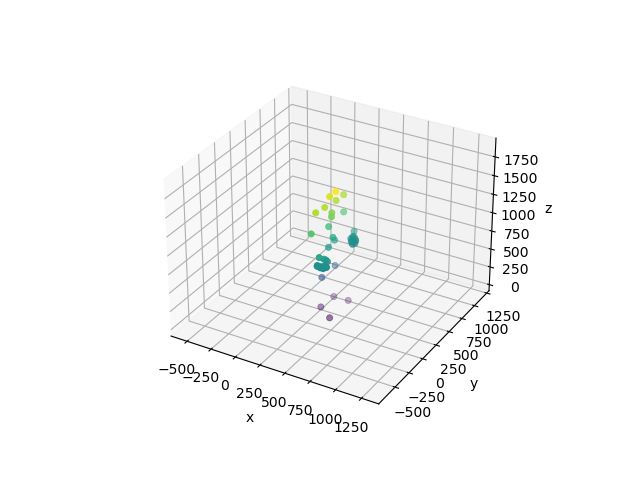

1000
373.2864304863714


In [9]:
from mpl_toolkits import mplot3d

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

ax = plt.axes(projection='3d')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');


r = 1 if np.max([x[0], y[0], z[0]]) <= 10 else 1000
print(r)
xroot, yroot, zroot = x[0], y[0], z[0]

print(xroot)
ax.set_xlim3d([-r + xroot, r + xroot])
ax.set_zlim3d([-r + zroot, r + zroot])
ax.set_ylim3d([-r + yroot, r + yroot])


ax.scatter(x, y, z, c=z, cmap='viridis', linewidth=0.5);


In [10]:
class Pose(object):
    def __init__(self, joint_parents):
        self.joint_parent = joint_parents
        

<IPython.core.display.Javascript object>


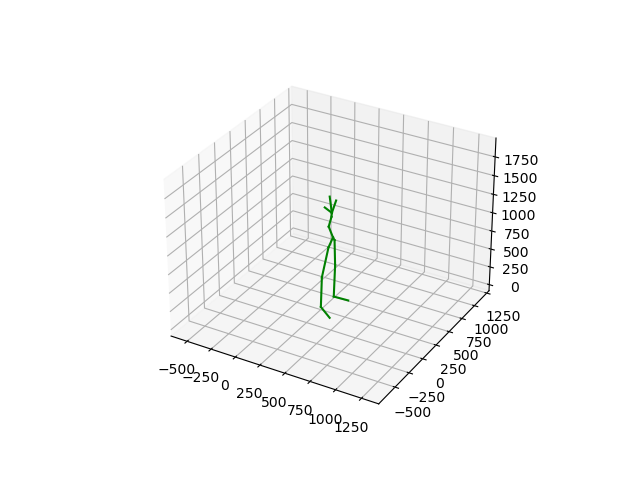

[362.90716076724755, 338.83221889369713]
[254.8116264484136, 173.54144045070396]


In [11]:
joint_parents = sio.loadmat('../data/AMASS/F_amass_Subject_1.mat', simplify_cells=True)
joint_parents = joint_parents['Subject_1_F_amass']['move']
joint_parents = joint_parents[1]['jointsParent']

pose = Pose(joint_parents)


from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


ax = plt.axes(projection='3d')
ax.set_xlim3d([-r + xroot, r + xroot])
ax.set_zlim3d([-r + zroot, r + zroot])
ax.set_ylim3d([-r + yroot, r + yroot])
temp = motion_capture[0]

# 2
xline = [temp[0, 0], temp[1, 0]]
yline = [temp[0, 1], temp[1, 1]]
zline = [temp[0, 2], temp[1, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 3
xline = [temp[0, 0], temp[2, 0]]
yline = [temp[0, 1], temp[2, 1]]
zline = [temp[0, 2], temp[2, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 4
xline = [temp[0, 0], temp[3, 0]]
yline = [temp[0, 1], temp[3, 1]]
zline = [temp[0, 2], temp[3, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 5
xline = [temp[1, 0], temp[4, 0]]
yline = [temp[1, 1], temp[4, 1]]
zline = [temp[1, 2], temp[4, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 6
xline = [temp[2, 0], temp[5, 0]]
yline = [temp[2, 1], temp[5, 1]]
zline = [temp[2, 2], temp[5, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 7
xline = [temp[3, 0], temp[6, 0]]
yline = [temp[3, 1], temp[6, 1]]
zline = [temp[3, 2], temp[6, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 8
xline = [temp[4, 0], temp[7, 0]]
yline = [temp[4, 1], temp[7, 1]]
zline = [temp[4, 2], temp[7, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 9
xline = [temp[5, 0], temp[8, 0]]
yline = [temp[5, 1], temp[8, 1]]
zline = [temp[5, 2], temp[8, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 10
xline = [temp[6, 0], temp[9, 0]]
yline = [temp[6, 1], temp[9, 1]]
zline = [temp[6, 2], temp[9, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 11
xline = [temp[7, 0], temp[10, 0]]
yline = [temp[7, 1], temp[10, 1]]
zline = [temp[7, 2], temp[10, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 12
xline = [temp[8, 0], temp[11, 0]]
yline = [temp[8, 1], temp[11, 1]]
zline = [temp[8, 2], temp[11, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 13
xline = [temp[9, 0], temp[12, 0]]
yline = [temp[9, 1], temp[12, 1]]
zline = [temp[9, 2], temp[12, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 14
xline = [temp[9, 0], temp[13, 0]]
yline = [temp[9, 1], temp[13, 1]]
zline = [temp[9, 2], temp[13, 2]]
ax.plot3D(xline, yline, zline, 'green')

# 15
xline = [temp[9, 0], temp[14, 0]]
yline = [temp[9, 1], temp[14, 1]]
zline = [temp[9, 2], temp[14, 2]]
ax.plot3D(xline, yline, zline, 'green')


print(xline)
print(yline)

<IPython.core.display.Javascript object>


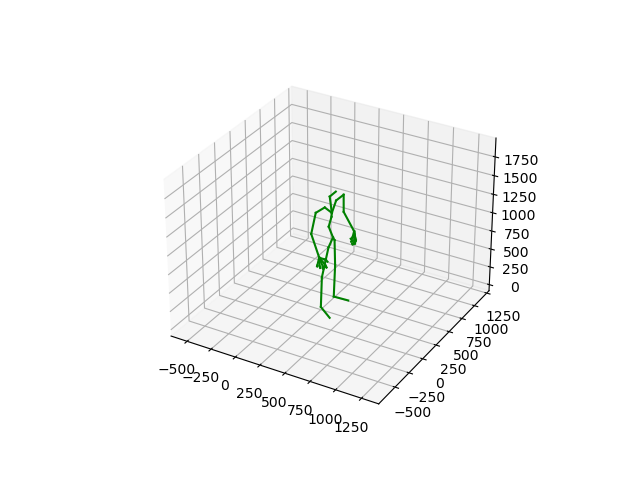

In [12]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


ax = plt.axes(projection='3d')
ax.set_xlim3d([-r + xroot, r + xroot])
ax.set_zlim3d([-r + zroot, r + zroot])
ax.set_ylim3d([-r + yroot, r + yroot])
temp = motion_capture[0]

for idx, val in enumerate(joint_parents):
    if idx == 0:
        continue
        
    xline = [temp[val - 1, 0], temp[idx, 0]]
    yline = [temp[val - 1, 1], temp[idx, 1]]
    zline = [temp[val - 1, 2], temp[idx, 2]]
    ax.plot3D(xline, yline, zline, 'green')

<IPython.core.display.Javascript object>


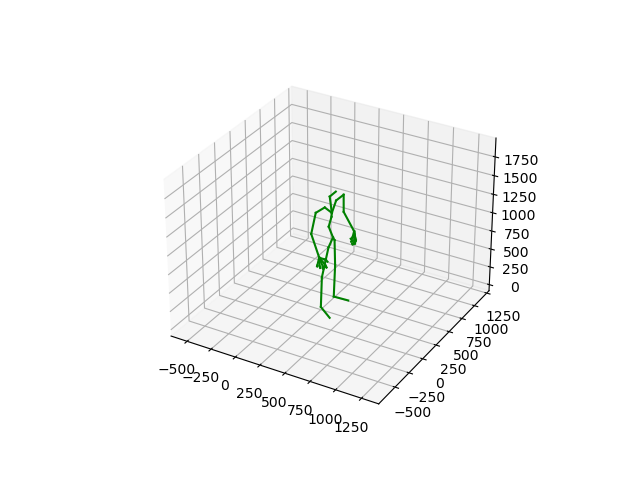

In [13]:
from mpl_toolkits import mplot3d
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


ax = plt.axes(projection='3d')
ax.set_xlim3d([-r + xroot, r + xroot])
ax.set_zlim3d([-r + zroot, r + zroot])
ax.set_ylim3d([-r + yroot, r + yroot])
temp = motion_capture[0]

for idx, val in enumerate(joint_parents):
    if idx == 0:
        continue
        
    xline = [temp[val - 1, 0], temp[idx, 0]]
    yline = [temp[val - 1, 1], temp[idx, 1]]
    zline = [temp[val - 1, 2], temp[idx, 2]]
    ax.plot3D(xline, yline, zline, 'green')



<IPython.core.display.Javascript object>


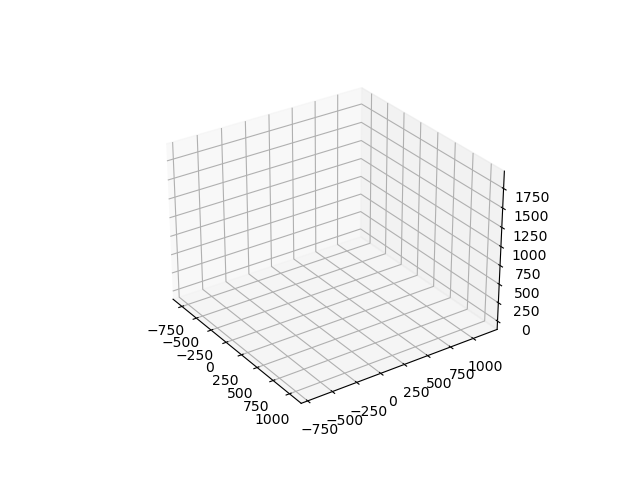

(146, 52, 3)


In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.gca(projection="3d")


def update(frame):
    ax.clear()
    temp = motion_capture[frame]
    
    for idx, val in enumerate(joint_parents):
        if idx == 0:
            continue
        xline = [temp[val - 1, 0], temp[idx, 0]]
        yline = [temp[val - 1, 1], temp[idx, 1]]
        zline = [temp[val - 1, 2], temp[idx, 2]]
        ax.plot3D(xline, yline, zline, 'green')

    
    x = temp[:, 0].astype(int)
    y = temp[:, 1].astype(int)
    z = temp[:, 2].astype(int)

    r = 1 if np.max([x[0], y[0], z[0]]) <= 10 else 1000
    xroot, yroot, zroot = x[0], y[0], z[0]

    ax.set_xlim3d([-r + xroot, r + xroot])
    ax.set_zlim3d([-r + zroot, r + zroot])
    ax.set_ylim3d([-r + yroot, r + yroot])

anim = FuncAnimation(
    fig,
    update,
    frames=np.arange(0, motion_capture.shape[0]),
    interval=motion_capture.shape[0] / 30,
    repeat=False,
)
print(motion_capture.shape)